# Inference with ssd300
This notebook demonstrates a standardized pipeline for utilizing pre-trained models (SSD) and their associated weights from the Torch Hub.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights, pretrain and 
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.
- [Torch Official SSD](https://pytorch.org/vision/main/models/ssd.html)
- [Nvidia Hub implementation](https://pytorch.org/hub/nvidia_deeplearningexamples_ssd/)

# Data

In [23]:
import urllib
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# Summary 
## One Cell scritps for inference on model and inference
Individuals who possess the ability to comprehend and follow the scripts presented in the subsequent cell may forgo the explanatory sections, as these sections provide a more detailed analysis of the aforementioned cells.

/home/howt51/miniforge3/envs/py310cv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/howt51/miniforge3/envs/py310cv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


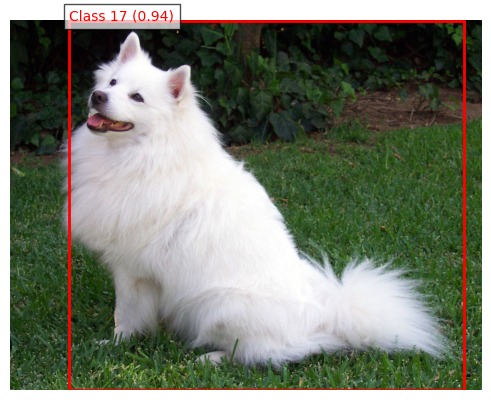

In [24]:
import torch
import torchvision
from torchvision.transforms import functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained SSD300 VGG16 model
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
ssd_model.eval()  # Set the model to evaluation mode

# Load an example image
image_path = 'dog.jpg'
image = Image.open(image_path)

# Preprocess the image

# Preprocess the image (adjust based on model requirements)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
processed_image = transform(image).unsqueeze(0)

# Run inference
with torch.no_grad():
    detections = ssd_model(processed_image)

# Extract bounding boxes, labels, and scores
boxes = detections[0]['boxes']
labels = detections[0]['labels']
scores = detections[0]['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.5:
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()


# Breakdown

The PyTorch vision library offers a comprehensive selection of pre-trained object detection models, as documented in the official PyTorch documentation: https://pytorch.org/vision/stable/models.html. (Please refer to the object detection section)

## 1. Model Loading - SSD300
The loaded model leverages a pre-trained Single-Shot MultiBox Detector (SSD300) architecture built upon a VGG16 convolutional neural network (CNN). This model falls under the category of single-stage object detectors, capable of generating object detections in a single forward pass.


In [25]:
import torchvision
# Load the pre-trained SSD300 VGG16 model
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
ssd_model.eval()  # Set the model to evaluation mode

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

## 2. Image loading with pytorch

In [26]:
# Load an example image
image_path = 'dog.jpg'
image = Image.open(image_path)

## 3. Preprocess the image
Define a transformation pipeline (adjust based on model requirements). 
 - The pixels value are normalised here, with the mean and standard deviation values for the ImageNet dataset.
 - The transformed image is then batched into a unit of 1

In [27]:
from torchvision import transforms
## Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
processed_image = transform(image).unsqueeze(0)
processed_image.shape

torch.Size([1, 3, 1213, 1546])

## 4. Model inference

In [28]:

# Run inference
with torch.no_grad():
    detections = ssd_model(processed_image)


## 5. Extracting and Visualising the output
- Object detection models' result consists of a dictionary of boxes, labels and scores. 
- The respectives keys extracted into a seperate list, which are then plotted out.

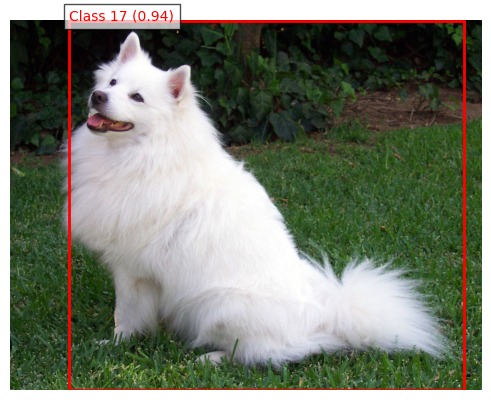

In [ ]:

# Extract bounding boxes, labels, and scores
boxes = detections[0]['boxes']
labels = detections[0]['labels']
scores = detections[0]['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.5:
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()